## Table des matières

- [Création du tableau 'data' pour l'analyse](#chapitre_1)
- [Analyse](#chapitre_2)
    - [Analyse des ventes](#chapitre_2_1)
        - [Chiffre d'affaires annuel](#chapitre_2_1_1)
        - [Nombre de ventes (sessions)](#chapitre_2_1_2)
        - [Chiffre d'affaires mensuel](#chapitre_2_1_3)
        - [Chiffre d'affaires par catégorie et par mois](#chapitre_2_1_4)
        - [Top 10 des meilleures ventes par mois](#chapitre_2_1_5)
        - [Nombre de sessions par mois](#chapitre_2_1_6)
        - [Nombre de sessions par catégorie](#chapitre_2_1_7)
        - [Nombre de sessions par catégorie et par mois](#chapitre_2_1_8)
        - [Indicateurs de tendance centrale et de dispersion pour l'ensemble des ventes](#chapitre_2_1_9)
        - [Distribution empirique des ventes sur l'ensemble des ventes](#chapitre_2_1_10)
        - [Indicateurs de tendance centrale et de dispersion pour les ventes de chaque catégorie de produit](#chapitre_2_1_11)
        - [Distribution empirique des ventes de produits de catégorie 0](#chapitre_2_1_12)
        - [Distribution empirique des ventes de produits de catégorie 1](#chapitre_2_1_13)
        - [Distribution empirique des ventes de produits de catégorie 2](#chapitre_2_1_14)
        - [Analyse de concentration pour l'ensemble des ventes](#chapitre_2_1_15)
        - [Graphique boxplot](#chapitre_2_1_16)
        - [Analyse de concentration pour les ventes de chaque catégorie de produit](#chapitre_2_1_17)
        - [Courbe de Lorenz des ventes et indice de Gini:](#chapitre_2_1_18)       
    - [Analyse des clients](#chapitre_2_2)
        - [Moyenne d'âge des clients pour chaque vente par catégorie et par mois](#chapitre_2_2_1)
        - [Répartition hommes / femmes](#chapitre_2_2_2)
        - [Répartition des ventes hommes / femmes selon catégorie de produit](#chapitre_2_2_3)
        - [Indicateurs de tendance centrale et de dispersion pour l'âge des clients](#chapitre_2_2_4)
        - [Distribution empirique des clients selon leur âge](#chapitre_2_2_5)
        - [Indicateurs de tendance centrale et de dispersion pour l'âge des clients de chaque catégorie de produit](#chapitre_2_2_6)
        - [Distribution empirique des clients des produits de catégorie 0](#chapitre_2_2_7)
        - [Distribution empirique des clients des produits de catégorie 1](#chapitre_2_2_8)
        - [Distribution empirique des clients des produits de catégorie 2](#chapitre_2_2_9)
        - [Analyse de concentration pour l'âge des clients sur l'ensemble des ventes](#chapitre_2_2_10)
        - [Analyse de concentration pour l'âge des clients de chaque catégorie de produit](#chapitre_2_2_11)
        - [Top 10 des meilleurs clients par mois](#chapitre_2_2_12)
- [Analyses bivariées](#chapitre_3)
- [Corrélations](#chapitre_4)
- [Mission n°3](#chapitre_5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

<a id="chapitre_1"></a>
## <span style="color: #030aa4">Création du tableau 'data' pour l'analyse</span>

In [2]:
customers = pd.read_csv('customers_clean.csv')
products = pd.read_csv('products_clean.csv')
transactions = pd.read_csv('transactions_clean.csv')

Problème lors de la jointure : des colonnes "Unnamed" apparaissent. 

Tentative de résolution : source: https://stackoverflow.com/questions/41087619/pandas-merge-how-to-avoid-unnamed-column


In [3]:
# Jointure des trois tableaux

Merge1 = pd.merge(transactions, customers, on='client_id')
Merge2 = pd.merge(transactions, products, on ='id_prod')
data = pd.merge(Merge1, Merge2)

data.head(3)

,id_prod,date,session_id,client_id,day,month,year,sex,birth,Unnamed: 0,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,10,4,2021,f,1977,1897,4.99,0
1,1_596,2021-09-12 02:11:24.774608,s_88567,c_4450,12,9,2021,f,1977,2799,11.12,1
2,1_278,2021-09-10 15:09:01.555889,s_87835,c_4450,10,9,2021,f,1977,2950,19.18,1


In [4]:
data = data.drop(columns='Unnamed: 0')

#### <span style="color: #348758">Rajout de la colonne 'âge' :</span>

In [5]:
# Les dates d'achat allant jusqu'au 28 février en 2022,
# l'âge de chaque client sera calculé au 1er mars 2022.

data['age']= 2022-data['birth']

#### <span style="color: #348758">Rajout de la colonne 'nombre de sessions' :</span>

In [6]:
data['nombre_de_sessions']= 1

data.head(3)

,id_prod,date,session_id,client_id,day,month,year,sex,birth,price,categ,age,nombre_de_sessions
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,10,4,2021,f,1977,4.99,0,45,1
1,1_596,2021-09-12 02:11:24.774608,s_88567,c_4450,12,9,2021,f,1977,11.12,1,45,1
2,1_278,2021-09-10 15:09:01.555889,s_87835,c_4450,10,9,2021,f,1977,19.18,1,45,1


<a id="chapitre_2"></a>
## <span style="color: #030aa4">Analyse</span>

#### <span style="color: #348758">Période analysée</span>

In [111]:
print(data.date.min())
print(data.date.max())

2021-03-01 00:01:07.843138
2022-02-28 23:59:58.040472


L'analyse couvre la période du 1er mars 2021 au 28 février 2022.

<a id="chapitre_2_1"></a>
### <span style="color: #a40334">Analyse des ventes</span>

<a id="chapitre_2_1_1"></a>
#### <span style="color: #348758">Chiffre d'affaires annuel :</span>

In [9]:
print("Le chiffre d'affaires annuel est de", round (data.price.sum(),2), "euros.")

Le chiffre d'affaires annuel est de 5796577.77 euros.


<a id="chapitre_2_1_2"></a>
#### <span style="color: #348758">Nombre de ventes (sessions) :</span>

In [14]:
print("Le nombre de sessions d'achats sur les 12 derniers mois est de", len(data),".")

Le nombre de sessions d'achats sur les 12 derniers mois est de 336713 .


<a id="chapitre_2_1_3"></a>
#### <span style="color: #348758">Chiffre d'affaires mensuel :</span>

No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


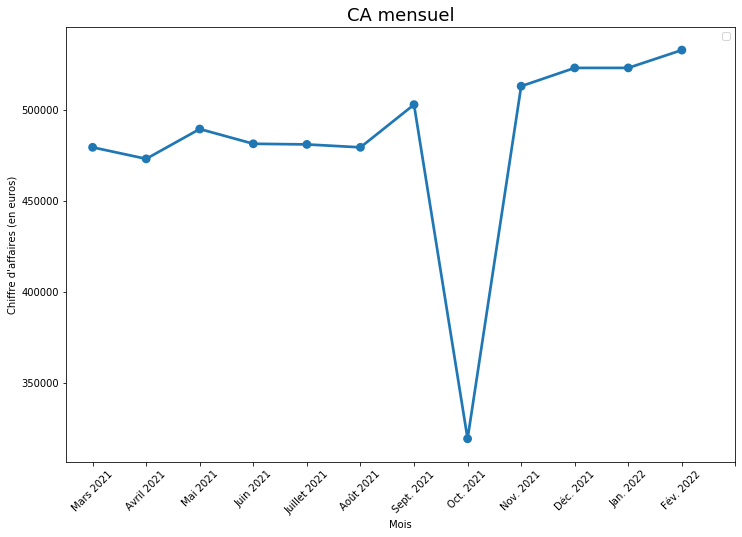

In [16]:
dataCAParMois = data

# Remplacement des valeurs 1 et 2 par 13 et 14 pour ordonner les mois
# (sinon on a d'abord janvier et février 2022 puis les autres mois en 2021)

dataCAParMois['month'].replace({1:13,2:14}, inplace = True)

dataCAParMois = dataCAParMois.groupby(['month'], as_index=False).sum()

dataCAParMois = dataCAParMois.loc[:,('month','price')]

# Création d'une figure de taille 12x8 inch

plt.figure(figsize=(12,8))

sns.pointplot(x='month',y='price',data=dataCAParMois)

plt.title("CA mensuel", fontsize=18)
marqueurs = [0,1,2,3,4,5,6,7,8,9,10,11,12]
xtick_labels = ['Mars 2021','Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Sept. 2021','Oct. 2021','Nov. 2021','Déc. 2021', 'Jan. 2022', 'Fév. 2022']
plt.xticks(marqueurs, xtick_labels ,rotation=45)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Mois', ylabel="Chiffre d'affaires (en euros)")

plt.savefig("01.CA_mensuel.pdf", pdi=300)

<a id="chapitre_2_1_4"></a>
#### <span style="color: #348758">Chiffre d'affaires par catégorie et par mois :</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


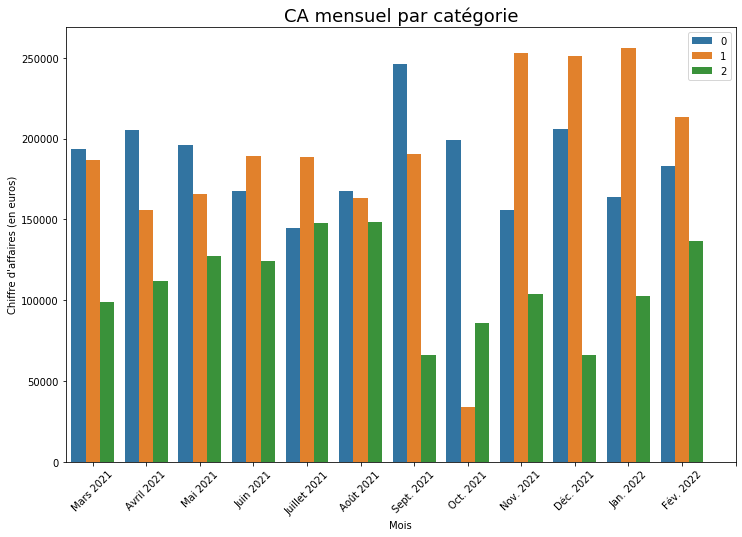

In [17]:
dataCAParMoisParCat = data

dataCAParMoisParCat['month'].replace({1:13,2:14}, inplace = True)

dataCAParMoisParCat = dataCAParMoisParCat.groupby(['month','categ'], as_index=False).sum()

dataCAParMoisParCat = dataCAParMoisParCat.loc[:,('month','categ','price')]

# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

sns.barplot(x='month',y='price', hue='categ',data=dataCAParMoisParCat)

plt.title("CA mensuel par catégorie", fontsize=18)
marqueurs = [0,1,2,3,4,5,6,7,8,9,10,11,12]
xtick_labels = ['Mars 2021','Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Sept. 2021','Oct. 2021','Nov. 2021','Déc. 2021', 'Jan. 2022', 'Fév. 2022']
plt.xticks(marqueurs, xtick_labels ,rotation=45)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Mois', ylabel="Chiffre d'affaires (en euros)")

plt.savefig("02.CA_mensuel_par_catégorie.pdf", pdi=300)

<a id="chapitre_2_1_5"></a>
#### <span style="color: #348758">Top 10 des meilleures ventes par mois :</span>

#### - Mars :

In [18]:
dataTop10 = data.sort_values(by='price')

dataTop10 = dataTop10.groupby(['id_prod','price','month'], as_index=False).sum()

dataTop10Mars2021 = dataTop10[dataTop10.month==3]
dataTop10Mars2021 = dataTop10Mars2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Mars2021 = dataTop10Mars2021.sort_values(by='nombre_de_sessions')
dataTop10Mars2021 = dataTop10Mars2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Mars2021 = dataTop10Mars2021.loc[::-1].head(10)

dataTop10Mars2021

,id_prod,price,nombre_de_sessions
24145,1_498,23.37,97
23429,1_417,20.99,95
23057,1_376,17.49,90
23173,1_388,16.70,90
23397,1_413,17.99,90
22987,1_369,23.99,88
23409,1_414,23.83,86
23242,1_396,18.60,85
23322,1_403,17.99,85
23338,1_406,24.81,85


#### - Avril :

In [19]:
dataTop10Avril2021 = dataTop10[dataTop10.month==4]
dataTop10Avril2021 = dataTop10Avril2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Avril2021 = dataTop10Avril2021.sort_values(by='nombre_de_sessions')
dataTop10Avril2021 = dataTop10Avril2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Avril2021 = dataTop10Avril2021.loc[::-1].head(10)

dataTop10Avril2021

,id_prod,price,nombre_de_sessions
23351,1_407,15.99,79
22988,1_369,23.99,79
24146,1_498,23.37,78
23267,1_398,10.17,76
23058,1_376,17.49,74
1,0_0,3.75,73
4527,0_1422,11.41,73
23430,1_417,20.99,71
23410,1_414,23.83,71
4675,0_1437,3.99,70


#### - Mai :

In [20]:
dataTop10Mai2021 = dataTop10[dataTop10.month==5]
dataTop10Mai2021 = dataTop10Mai2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Mai2021 = dataTop10Mai2021.sort_values(by='nombre_de_sessions')
dataTop10Mai2021 = dataTop10Mai2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Mai2021 = dataTop10Mai2021.loc[::-1].head(10)

dataTop10Mai2021

,id_prod,price,nombre_de_sessions
23431,1_417,20.99,82
23411,1_414,23.83,74
23244,1_396,18.60,73
24147,1_498,23.37,72
22989,1_369,23.99,71
23304,1_400,16.60,69
23340,1_406,24.81,68
23387,1_412,16.65,68
23059,1_376,17.49,67
23399,1_413,17.99,65


#### - Juin :

In [21]:
dataTop10Juin2021 = dataTop10[dataTop10.month==6]
dataTop10Juin2021 = dataTop10Juin2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Juin2021 = dataTop10Juin2021.sort_values(by='nombre_de_sessions')
dataTop10Juin2021 = dataTop10Juin2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Juin2021 = dataTop10Juin2021.loc[::-1].head(10)

dataTop10Juin2021

,id_prod,price,nombre_de_sessions
23388,1_412,16.65,97
23432,1_417,20.99,96
22990,1_369,23.99,96
23412,1_414,23.83,92
24148,1_498,23.37,90
23477,1_425,16.99,89
23269,1_398,10.17,85
23325,1_403,17.99,84
23257,1_397,18.99,82
23245,1_396,18.60,81


#### - Juillet :

In [22]:
dataTop10Juillet2021 = dataTop10[dataTop10.month==7]
dataTop10Juillet2021 = dataTop10Juillet2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Juillet2021 = dataTop10Juillet2021.sort_values(by='nombre_de_sessions')
dataTop10Juillet2021 = dataTop10Juillet2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Juillet2021 = dataTop10Juillet2021.loc[::-1].head(10)

dataTop10Juillet2021

,id_prod,price,nombre_de_sessions
23413,1_414,23.83,98
22991,1_369,23.99,97
23478,1_425,16.99,95
23270,1_398,10.17,95
23061,1_376,17.49,93
23234,1_395,28.99,87
23220,1_392,18.11,84
23258,1_397,18.99,81
23433,1_417,20.99,79
24149,1_498,23.37,79


#### - Août :

In [23]:
dataTop10Aout2021 = dataTop10[dataTop10.month==8]
dataTop10Aout2021 = dataTop10Aout2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Aout2021 = dataTop10Aout2021.sort_values(by='nombre_de_sessions')
dataTop10Aout2021 = dataTop10Aout2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Aout2021 = dataTop10Aout2021.loc[::-1].head(10)

dataTop10Aout2021

,id_prod,price,nombre_de_sessions
23343,1_406,24.81,87
23414,1_414,23.83,87
23479,1_425,16.99,76
23271,1_398,10.17,73
22992,1_369,23.99,70
23355,1_407,15.99,70
23154,1_385,25.99,67
23079,1_378,26.61,67
22974,1_367,13.99,66
23235,1_395,28.99,66


#### - Septembre :

In [24]:
dataTop10Sept2021 = dataTop10[dataTop10.month==9]
dataTop10Sept2021 = dataTop10Sept2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Sept2021 = dataTop10Sept2021.sort_values(by='nombre_de_sessions')
dataTop10Sept2021 = dataTop10Sept2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Sept2021 = dataTop10Sept2021.loc[::-1].head(10)

dataTop10Sept2021

,id_prod,price,nombre_de_sessions
22993,1_369,23.99,98
23435,1_417,20.99,93
23328,1_403,17.99,91
23155,1_385,25.99,90
23403,1_413,17.99,89
23248,1_396,18.60,86
23308,1_400,16.60,83
23915,1_468,17.75,82
23415,1_414,23.83,82
4547,0_1424,8.41,81


#### - Octobre :

In [25]:
dataTop10Oct2021 = dataTop10[dataTop10.month==10]
dataTop10Oct2021 = dataTop10Oct2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Oct2021 = dataTop10Oct2021.sort_values(by='nombre_de_sessions')
dataTop10Oct2021 = dataTop10Oct2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Oct2021 = dataTop10Oct2021.loc[::-1].head(10)

dataTop10Oct2021

,id_prod,price,nombre_de_sessions
4586,0_1428,3.55,67
4638,0_1432,15.36,63
4486,0_1419,8.99,63
4598,0_1429,7.99,62
4450,0_1416,9.56,60
4961,0_1461,11.99,60
4521,0_1421,19.99,60
5069,0_1472,12.49,59
4533,0_1422,11.41,59
4341,0_1405,4.99,59


#### - Novembre :

In [26]:
dataTop10Nov2021 = dataTop10[dataTop10.month==11]
dataTop10Nov2021 = dataTop10Nov2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Nov2021 = dataTop10Nov2021.sort_values(by='nombre_de_sessions')
dataTop10Nov2021 = dataTop10Nov2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Nov2021 = dataTop10Nov2021.loc[::-1].head(10)

dataTop10Nov2021

,id_prod,price,nombre_de_sessions
23393,1_412,16.65,131
23238,1_395,28.99,124
24153,1_498,23.37,123
23482,1_425,16.99,118
23181,1_388,16.70,117
22995,1_369,23.99,116
23250,1_396,18.60,115
23358,1_407,15.99,113
23437,1_417,20.99,113
23405,1_413,17.99,111


#### - Décembre :

In [27]:
dataTop10Dec2021 = dataTop10[dataTop10.month==12]
dataTop10Dec2021 = dataTop10Dec2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Dec2021 = dataTop10Dec2021.sort_values(by='nombre_de_sessions')
dataTop10Dec2021 = dataTop10Dec2021.drop_duplicates(subset='id_prod', keep='last')
dataTop10Dec2021 = dataTop10Dec2021.loc[::-1].head(10)

dataTop10Dec2021

,id_prod,price,nombre_de_sessions
23438,1_417,20.99,125
23406,1_413,17.99,123
23483,1_425,16.99,119
22996,1_369,23.99,117
24154,1_498,23.37,116
23225,1_392,18.11,116
23359,1_407,15.99,114
23394,1_412,16.65,106
23083,1_378,26.61,105
23331,1_403,17.99,105


#### - Janvier :

In [28]:
dataTop10Jan2022 = dataTop10[dataTop10.month==13]
dataTop10Jan2022 = dataTop10Jan2022.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Jan2022 = dataTop10Jan2022.sort_values(by='nombre_de_sessions')
dataTop10Jan2022 = dataTop10Jan2022.drop_duplicates(subset='id_prod', keep='last')
dataTop10Jan2022 = dataTop10Jan2022.loc[::-1].head(10)
dataTop10Jan2022

,id_prod,price,nombre_de_sessions
22997,1_369,23.99,129
24155,1_498,23.37,125
23439,1_417,20.99,125
23332,1_403,17.99,123
23348,1_406,24.81,123
23484,1_425,16.99,118
23312,1_400,16.60,115
23419,1_414,23.83,114
23395,1_412,16.65,110
23252,1_396,18.60,103


#### - Février :

In [29]:
dataTop10Fev2022 = dataTop10[dataTop10.month==14]
dataTop10Fev2022 = dataTop10Fev2022.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10Fev2022 = dataTop10Fev2022.sort_values(by='nombre_de_sessions')
dataTop10Fev2022 = dataTop10Fev2022.drop_duplicates(subset='id_prod', keep='last')
dataTop10Fev2022 = dataTop10Fev2022.loc[::-1].head(10)

dataTop10Fev2022

,id_prod,price,nombre_de_sessions
23485,1_425,16.99,109
24156,1_498,23.37,106
22998,1_369,23.99,105
23440,1_417,20.99,105
23408,1_413,17.99,100
23420,1_414,23.83,98
23227,1_392,18.11,96
23196,1_389,24.99,95
23277,1_398,10.17,94
23143,1_383,28.99,93


<a id="chapitre_2_1_6"></a>
#### <span style="color: #348758">Nombre de sessions par mois :</span>

No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


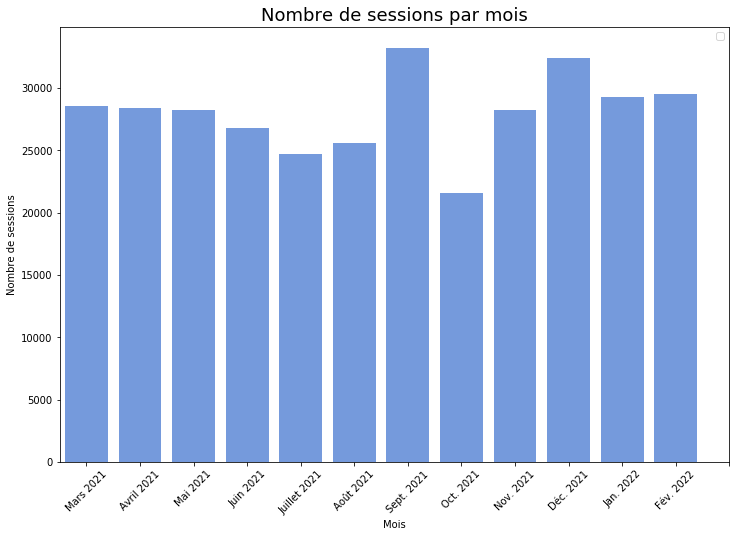

In [30]:
dataSession = data.groupby(['month'], as_index=False).sum()

dataSession = dataSession.loc[:,('month','nombre_de_sessions')]

dataSession['month'].replace({1:13,2:14}, inplace = True)

plt.figure(figsize=(12,8))

sns.barplot(x=dataSession['month'], y=dataSession['nombre_de_sessions'], data=dataSession, color = 'cornflowerblue')

plt.title("Nombre de sessions par mois", fontsize=18)
marqueurs = [0,1,2,3,4,5,6,7,8,9,10,11,12]
xtick_labels = ['Mars 2021','Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Sept. 2021','Oct. 2021','Nov. 2021','Déc. 2021', 'Jan. 2022', 'Fév. 2022']
plt.xticks(marqueurs, xtick_labels ,rotation=45)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Mois', ylabel="Nombre de sessions")

plt.savefig("03.Nombre_sessions_par_mois.pdf", dpi=300)

<a id="chapitre_2_1_7"></a>
#### <span style="color: #348758">Nombre de sessions par catégorie :</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


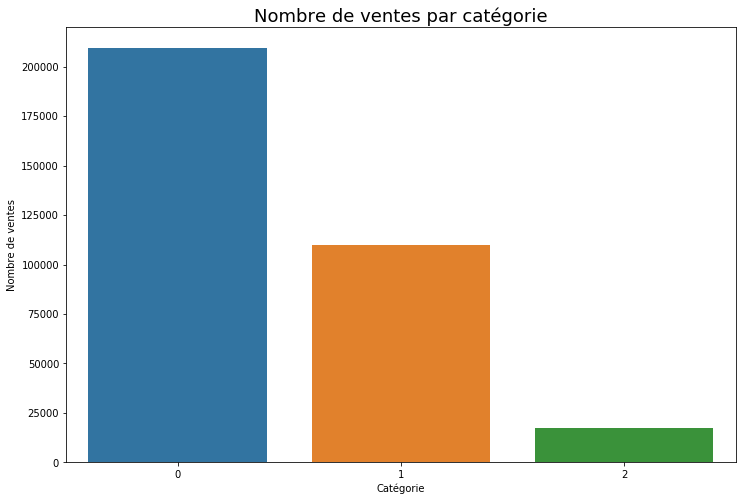

In [31]:
plt.figure(figsize=(12,8))

sns.countplot(x='categ',data=data)

plt.title('Nombre de ventes par catégorie', fontsize=18)
ax = plt.axes()
ax= ax.set(xlabel='Catégorie', ylabel='Nombre de ventes')

plt.savefig("04.Nombre_de_ventes_par_categorie.pdf", dpi=300)

In [32]:
print ("La majorité des produits vendus sont de catégorie 0:")
print ("- ",len(data[data.categ==0]), "produits vendus de catégorie 0")
print ("- ",len(data[data.categ==1]), "produits vendus de catégorie 1")
print ("- ",len(data[data.categ==2]), "produits vendus de catégorie 2")

La majorité des produits vendus sont de catégorie 0:
-  209426 produits vendus de catégorie 0
-  109735 produits vendus de catégorie 1
-  17552 produits vendus de catégorie 2


<a id="chapitre_2_1_8"></a>
#### <span style="color: #348758">Nombre de sessions par catégorie et par mois :</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


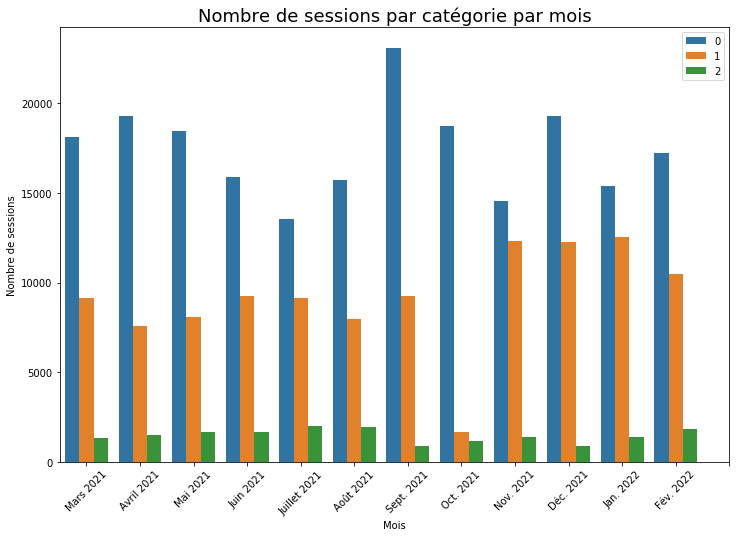

In [33]:
# Création d'un tableau recensant le nombre de sessions par mois

dataSessionParCat = data

dataSessionParCat['nombre_de_sessions']= 1

dataSessionParCat = dataSessionParCat.groupby(['month','categ'], as_index=False).sum()

dataSessionParCat = dataSessionParCat.loc[:,('month','categ','nombre_de_sessions')]

# Remplacement des valeurs 1 et 2 par 13 et 14 pour ordonner les mois
# (sinon on a d'abord janvier et février 2022 puis le reste en 2021)

dataSessionParCat['month'].replace({1:13,2:14}, inplace = True)

# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

sns.barplot(x=dataSessionParCat['month'], y=dataSessionParCat['nombre_de_sessions'], data=dataSessionParCat, hue='categ')

plt.title("Nombre de sessions par catégorie par mois", fontsize=18)
marqueurs = [0,1,2,3,4,5,6,7,8,9,10,11,12]
xtick_labels = ['Mars 2021','Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Sept. 2021','Oct. 2021','Nov. 2021','Déc. 2021', 'Jan. 2022', 'Fév. 2022']
plt.xticks(marqueurs, xtick_labels ,rotation=45)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Mois', ylabel="Nombre de sessions")

plt.savefig("05.Nombre_sessions_par_catégorie_par_mois.pdf", pdi=300)

<a id="chapitre_2_1_9"></a>
#### <span style="color: #348758">Indicateurs de tendance centrale et de dispersion pour l'ensemble des ventes :</span>

In [112]:
# Prix de vente moyen
meanPrice = data['price'].mean()

# Prix mde vente médian
medPrice = data['price'].median()

# Prix de vente le plus fréquent
modPrice = data['price'].mode()[0]

print("En moyenne, une vente est de", round(meanPrice,2), "euros.")
print("50% des ventes ont un prix inférieur à", medPrice, "euros.")
print("Le prix de vente le plus fréquent est de", modPrice,"euros.")

# Forme de la distribution empirique des ventes
if modPrice == medPrice == meanPrice :
    print("La distribution des ventes est symétrique.")
elif modPrice < medPrice < meanPrice :
    print("La distribution des ventes est étalée à droite.")
else:
    print("La distribution des ventes est étalée à gauche.")

En moyenne, une vente est de 17.22 euros.
50% des ventes ont un prix inférieur à 13.9 euros.
Le prix de vente le plus fréquent est de 15.99 euros.
La distribution des ventes est étalée à gauche.


<a id="chapitre_2_1_10"></a>
#### <span style="color: #348758">Distribution empirique des ventes :</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


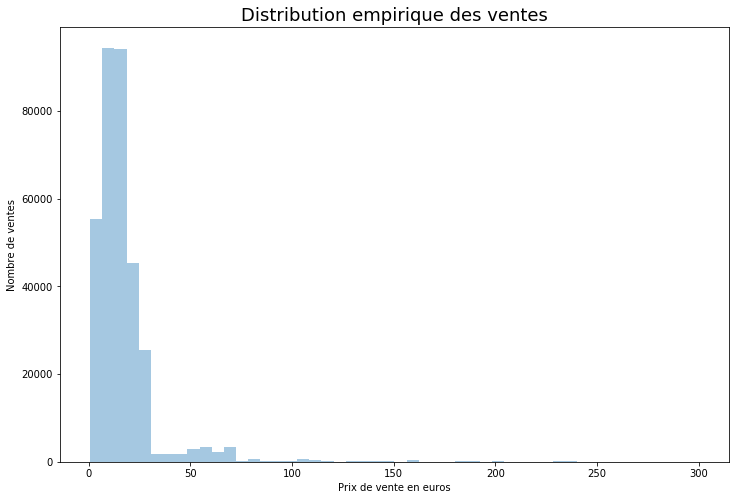

In [38]:
# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

sns.distplot(data['price'], kde=False)

plt.title("Distribution empirique des ventes", fontsize=18)
ax = plt.axes()
ax = ax.set(xlabel='Prix de vente en euros', ylabel="Nombre de ventes")

#plt.savefig("Distribution empirique des ventes.png", transparent=True)
plt.savefig("06.Distribution_empirique_ventes.pdf", dpi=300)

<a id="chapitre_2_1_11"></a>
#### <span style="color: #348758">Indicateurs de tendance centrale et de dispersion pour les ventes de chaque catégorie de produit :</span>

--------------------
0
moy:
 10.64682823527418
med:
 9.99
mod:
 4.99
La distribution des ventes des produits de catégorie 0 est étalée à droite.
--------------------
1
moy:
 20.480105800342763
med:
 19.08
mod:
 15.99
La distribution des ventes des produits de catégorie 1 est étalée à droite.
--------------------
2
moy:
 75.17494929352526
med:
 62.83
mod:
 68.99
La distribution des ventes des produits de catégorie 2 est étalée à gauche.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

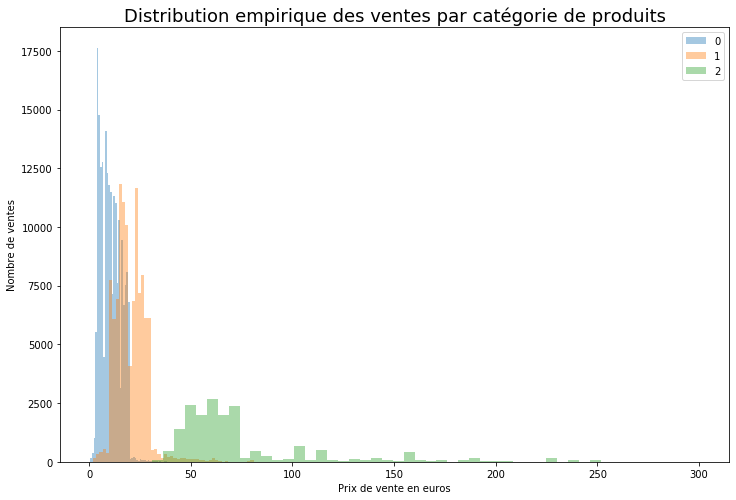

In [39]:
# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

for cat in data["categ"].unique():
    subset = data[data.categ == cat] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['price'].mean())
    print("med:\n",subset['price'].median())
    print("mod:\n",subset['price'].mode()[0])
    modPriceParCat = subset['price'].mode()[0]
    medPriceParCat = subset['price'].median()
    meanPriceParCat = subset['price'].mean()
    if modPriceParCat == medPriceParCat == meanPriceParCat :
        print("La distribution des ventes des produits de catégorie", cat, "est symétrique.")
    elif modPriceParCat < medPriceParCat < meanPriceParCat :
        print("La distribution des ventes des produits de catégorie", cat, "est étalée à droite.")
    else:
        print("La distribution des ventes des produits de catégorie", cat, "est étalée à gauche.")
    
for cat in data["categ"].unique():
    subset = data[data.categ == cat] # Création du sous-échantillon    
    sns.distplot(subset['price'], kde=False, label= cat)
    plt.title("Distribution empirique des ventes par catégorie de produits", fontsize=18)
    plt.legend(loc='best')
    ax = plt.axes()
    ax = ax.set(xlabel='Prix de vente en euros', ylabel="Nombre de ventes")

plt.savefig("07.Distribution_empirique_ventes_par_catégorie_produits.pdf", dpi=300)

<a id="chapitre_2_1_12"></a>
#### <span style="color: #348758">Distribution empirique des ventes de produits de catégorie 0 :</span>

No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


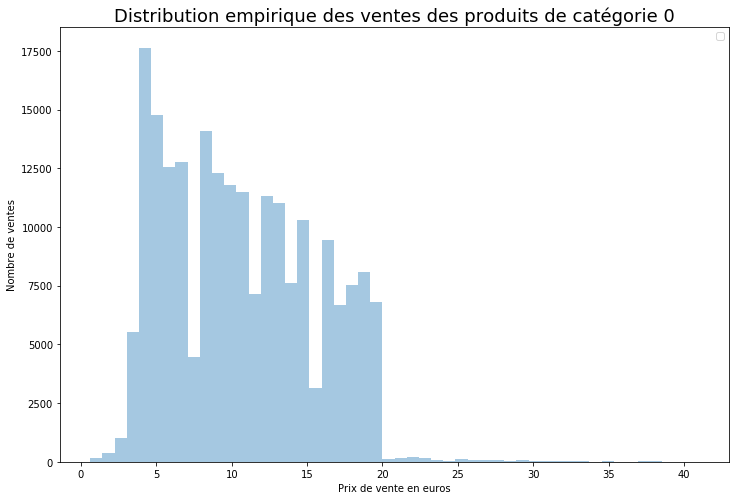

In [40]:
VenteProduitCateg0 = data[data.categ == 0]   

plt.figure(figsize=(12,8))

sns.distplot(VenteProduitCateg0['price'], kde=False)
plt.title("Distribution empirique des ventes des produits de catégorie 0", fontsize=18)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Prix de vente en euros', ylabel="Nombre de ventes")
    
plt.savefig("08.Distribution_empirique_ventes_produits_catégorie_0.pdf", dpi=300)

<a id="chapitre_2_1_13"></a>
#### <span style="color: #348758">Distribution empirique des ventes de produits de catégorie 1 :</span>

No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


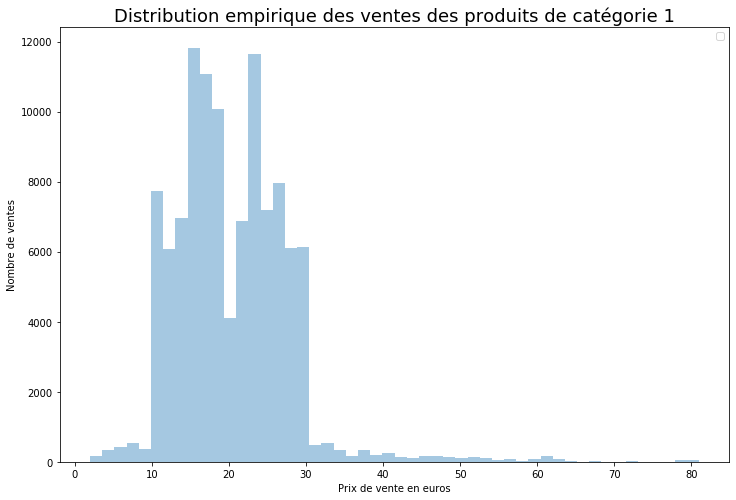

In [41]:
VenteProduitCateg1 = data[data.categ == 1]   

plt.figure(figsize=(12,8))

sns.distplot(VenteProduitCateg1['price'], kde=False)
plt.title("Distribution empirique des ventes des produits de catégorie 1", fontsize=18)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Prix de vente en euros', ylabel="Nombre de ventes")
    
plt.savefig("09.Distribution_empirique_ventes_produits_catégorie_1.pdf", dpi=300)

<a id="chapitre_2_1_14"></a>
#### <span style="color: #348758">Distribution empirique des ventes de produits de catégorie 2 :</span>

No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


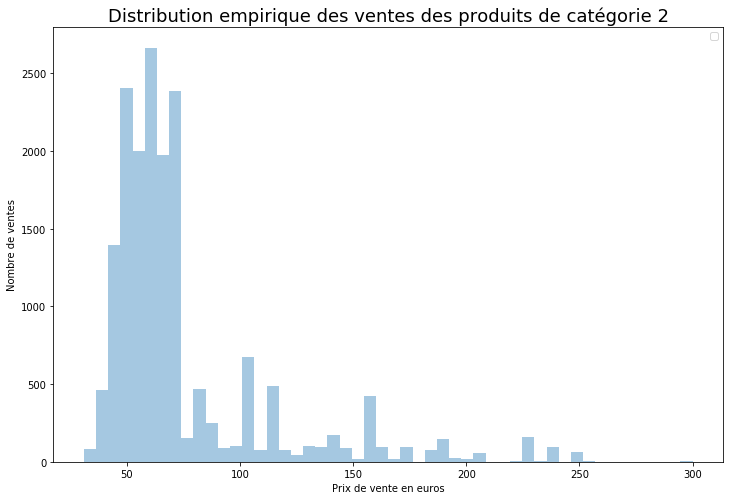

In [42]:
VenteProduitCateg2 = data[data.categ == 2]   

plt.figure(figsize=(12,8))

sns.distplot(VenteProduitCateg2['price'], kde=False)
plt.title("Distribution empirique des ventes des produits de catégorie 2", fontsize=18)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Prix de vente en euros', ylabel="Nombre de ventes")
    
plt.savefig("10.Distribution_empirique_ventes_produits_catégorie_2.pdf", dpi=300)

<a id="chapitre_2_1_15"></a>
#### <span style="color: #348758">Analyse de concentration pour l'ensemble des ventes :</span>

In [92]:
# Variance empirique des ventes
varPrice = data['price'].var(ddof=0)
# Le diviseur expliqué dans les calculs est N-ddof où N est le nombre d'échantillons.
# Il faut donc préciser que ddof=0 pour respecter la formule de variance empirique.

# Variance empirique corrigée des ventes
varCorrPrice = ((data['price'].sum())/(data['price'].sum()-1))*varPrice

# Écart-type des ventes
ectPrice = data['price'].std(ddof=0)


print("La variance empirique des ventes est de",round(varPrice,2), "euros.")
print("La variance empirique corrigée des ventes est de",round(varCorrPrice,2), "euros.")
print("L'écart-type des ventes est de", round(ectPrice,2),"euros.")

# Skewness empirique des ventes

SkewnessPrice = data['price'].skew()

if SkewnessPrice < 0:
    print("Le skewness empirique est égal à",SkewnessPrice,".")
    print("La distribution empirique des ventes est étalée à gauche.")
elif SkewnessPrice > 0:
    print("Le skewness empirique est égal à",SkewnessPrice,".")
    print("La distribution empirique des ventes est étalée à droite.")
else:
    print("Le skewness empirique est égal à",SkewnessPrice,".")
    print("La distribution empirique des ventes est symétrique.")
    
# Kurtosis empirique des ventes

KurtosisPrice = data['price'].kurtosis()

if KurtosisPrice < 0:
    print("Le kurtosis empirique est égal à",KurtosisPrice,".")
    print("La distribution est plus aplatie qu'une distribution normale.")
    print("Les observations sont moins concentrées.")
elif KurtosisPrice > 0:
    print("Le kurtosis empirique est égal à",KurtosisPrice,".")
    print("La distribution est moins aplatie qu'une distribution normale.")
    print("Les observations sont plus concentrées.")
else:
    print("Le kurtosis empirique est égal à",KurtosisPrice,".")
    print("La distribution a le même aplatissement qu'une distribution normale.")

La variance empirique des ventes est de 318.82 euros.
La variance empirique corrigée des ventes est de 318.82 euros.
L'écart-type des ventes est de 17.86 euros.
Le skewness empirique est égal à 5.479196379351584 .
La distribution empirique des ventes est étalée à droite.
Le kurtosis empirique est égal à 45.42520484470875 .
La distribution est moins aplatie qu'une distribution normale.
Les observations sont plus concentrées.


<a id="chapitre_2_1_16"></a>
#### <span style="color: #348758">Graphique boxplot :</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


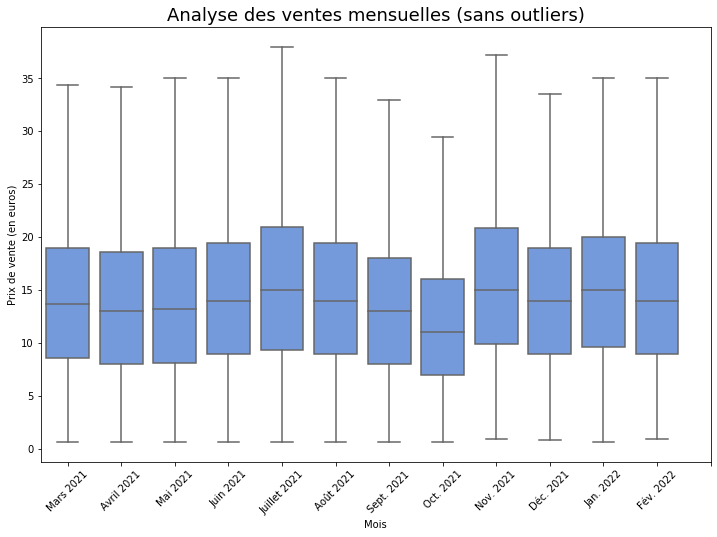

In [48]:
data_CA_Par_Mois = data

data_CA_Par_Mois['month'].replace({1:13,2:14}, inplace = True)

# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

# Graphique boîte à moustache
sns.boxplot(x=data_CA_Par_Mois['month'], y=data_CA_Par_Mois['price'], data=data_CA_Par_Mois, showfliers=False, color = 'cornflowerblue')
# L'argument 'showfliers=False' permet de ne pas afficher les outliers


plt.title("Analyse des ventes mensuelles (sans outliers)", fontsize=18)
marqueurs = [0,1,2,3,4,5,6,7,8,9,10,11,12]
xtick_labels = ['Mars 2021','Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Sept. 2021','Oct. 2021','Nov. 2021','Déc. 2021', 'Jan. 2022', 'Fév. 2022']
plt.xticks(marqueurs, xtick_labels ,rotation=45)
ax = plt.axes()
ax = ax.set(xlabel='Mois', ylabel="Prix de vente (en euros)")

plt.savefig("11. Boxplot_CA_mensuel.pdf", dpi=300) 

<a id="chapitre_2_1_17"></a>
#### <span style="color: #348758">Analyse de concentration pour les ventes de chaque catégorie de produit :</span>

In [49]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("var:\n",subset['price'].var(ddof=0))
    print("ect:\n",subset['price'].std(ddof=0))
    print("skw:\n",subset['price'].skew())
    print("kur:\n",subset['price'].kurtosis())
    SkewnessPrice = subset['price'].skew()
    if SkewnessPrice < 0:
        print("Le skewness empirique est égal à",SkewnessPrice,".")
        print("La distribution est étalée à gauche.")
    elif SkewnessPrice > 0:
        print("Le skewness empirique est égal à",SkewnessPrice,".")
        print("La distribution est étalée à droite.")
    else:
        print("Le skewness empirique est égal à",SkewnessPrice,".")
        print("La distribution est symétrique.")
    KurtosisPrice = subset['price'].kurtosis()
    if KurtosisPrice < 0:
        print("Le kurtosis empirique est égal à",KurtosisPrice,".")
        print("La distribution est plus aplatie qu'une distribution normale.")
        print("Les observations sont moins concentrée.")
    elif KurtosisPrice > 0:
        print("Le kurtosis empirique est égal à",KurtosisPrice,".")
        print("La distribution est moins aplatie qu'une distribution normale.")
        print("Les observations sont plus concentrée.")
    else:
        print("Le kurtosis empirique est égal à",KurtosisPrice,".")
        print("La distribution a le même aplatissement qu'une distribution normale.")

--------------------
0
var:
 24.30507748634591
ect:
 4.930018000610739
skw:
 0.42651796329970987
kur:
 -0.3737082588526075
Le skewness empirique est égal à 0.42651796329970987 .
La distribution est étalée à droite.
Le kurtosis empirique est égal à -0.3737082588526075 .
La distribution est plus aplatie qu'une distribution normale.
Les observations sont moins concentrée.
--------------------
1
var:
 57.28857407270668
ect:
 7.568921592453358
skw:
 1.727288185296097
kur:
 8.154192525286469
Le skewness empirique est égal à 1.727288185296097 .
La distribution est étalée à droite.
Le kurtosis empirique est égal à 8.154192525286469 .
La distribution est moins aplatie qu'une distribution normale.
Les observations sont plus concentrée.
--------------------
2
var:
 1527.1592950064853
ect:
 39.07888553946345
skw:
 2.315631002662294
kur:
 5.537461225837992
Le skewness empirique est égal à 2.315631002662294 .
La distribution est étalée à droite.
Le kurtosis empirique est égal à 5.537461225837992 .
L

<a id="chapitre_2_1_18"></a>
#### <span style="color: #348758">Courbe de Lorenz des ventes et indice de Gini : </span>

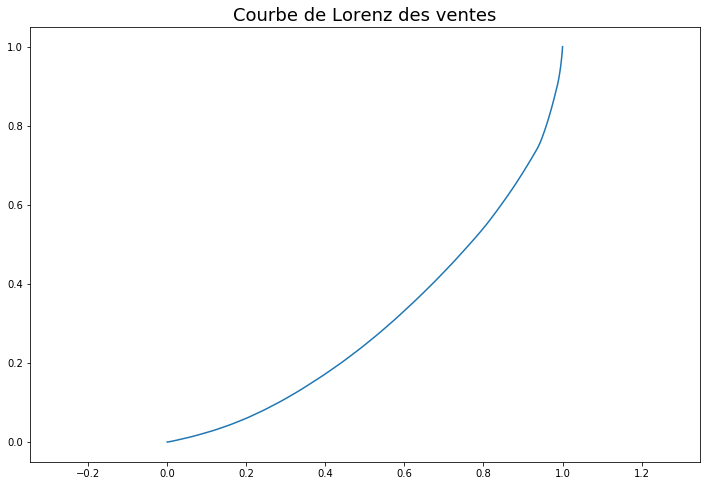

<Figure size 432x288 with 0 Axes>

In [50]:
# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

vente = data['price'].values

n = len(vente)
lorenz = np.cumsum(np.sort(vente)) / vente.sum() # tri avec np.sort() puis somme cumulée avec np.cumsum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title('Courbe de Lorenz des ventes', fontsize=18)
plt.show()

plt.savefig("12.Courbe_Lorenz_ventes.pdf", dpi=300) 

In [51]:
# Surface sous la courbe de Lorenz.
# Le premier segment (lorenz[0]) est à moitié en dessous de 0,
# on le coupe donc en 2,
# on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n

# surface entre la première bissectrice et le courbe de Lorenz

S = 0.5 - AUC
gini = 2*S

if gini == 1:
    print("L'indice de Gini est égal à",round(gini,2),". Les ventes sont uniformément réparties selon leur prix.")
elif 1 > gini > 0.5:
    print("L'indice de Gini est égal à",round(gini,2),". Les ventes sont relativement uniformément réparties selon leur prix.")
elif 0 < gini < 0.5:
    print("L'indice de Gini est égal à",round(gini,2),". Les ventes ne sont pas uniformément réparties selon leur prix.")
elif gini == 0:
    print("L'indice de Gini est égal à",round(gini,2),". Les ventes sont concentrées sur une seule valeur de prix.")

L'indice de Gini est égal à 0.39 . Les ventes ne sont pas uniformément réparties selon leur prix.


<a id="chapitre_2_2"></a>
### <span style="color: #a40334">Analyse des clients</span>

<a id="chapitre_2_2_1"></a>
#### <span style="color: #348758">Moyenne d'âge des clients pour chaque vente par catégorie et par mois :</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


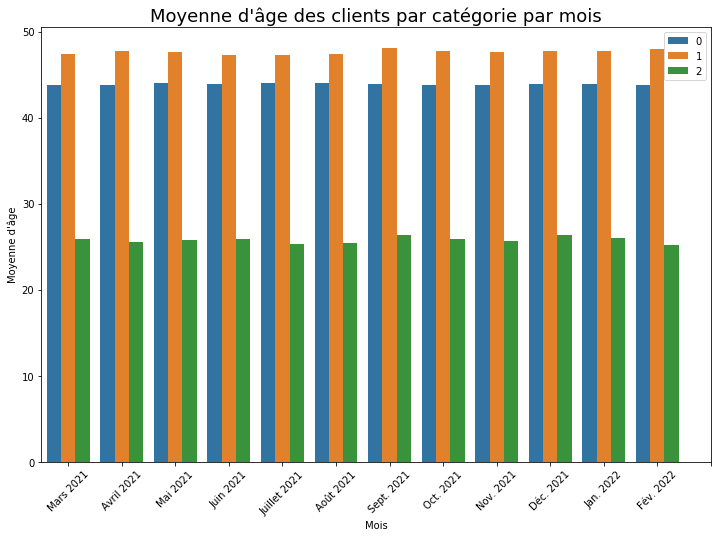

In [52]:
dataMoyAgeClientParCatParMois = data

dataMoyAgeClientParCatParMois['month'].replace({1:13,2:14}, inplace = True)

dataMoyAgeClientParCatParMois = dataMoyAgeClientParCatParMois.groupby(['month','categ'], as_index=False).mean()

dataMoyAgeClientParCatParMois = dataMoyAgeClientParCatParMois.loc[:,('month','categ','age')]

# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

sns.barplot(x='month',y='age', hue='categ',data=dataMoyAgeClientParCatParMois)

plt.title("Moyenne d'âge des clients par catégorie par mois", fontsize=18)
marqueurs = [0,1,2,3,4,5,6,7,8,9,10,11,12]
xtick_labels = ['Mars 2021','Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Sept. 2021','Oct. 2021','Nov. 2021','Déc. 2021', 'Jan. 2022', 'Fév. 2022']
plt.xticks(marqueurs, xtick_labels ,rotation=45)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Mois', ylabel="Moyenne d'âge")

plt.savefig("13.Age_Moyen_Client_par_catégorie_par_mois.pdf", pdi=300)

<a id="chapitre_2_2_2"></a>
#### <span style="color: #348758">Répartition hommes / femmes :</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


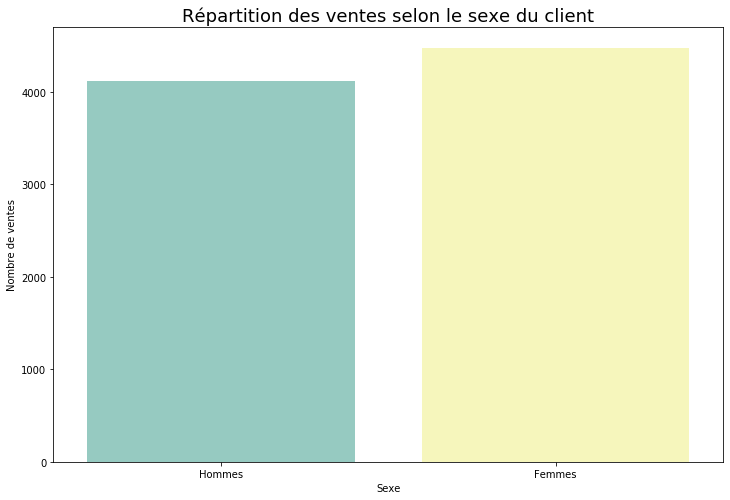

In [53]:
dataDiffClientSex = data.groupby(['client_id','sex'], as_index=False).mean()
# L'argument "as_index=False" permet d'éviter que les colonnes spécifiées dans "groupby"
# deviennent des index et ne peuvent donc plus être manipulées

# Projection pour ne conserver que les colonnes "client_id" et "sex" 
dataDiffClientSex = dataDiffClientSex.loc[ : ,("client_id","sex")]

# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

sns.countplot(x='sex', data=dataDiffClientSex, palette="Set3")
plt.title("Répartition des ventes selon le sexe du client", fontsize=18)
marqueurs = [0,1]
xtick_labels = ['Hommes','Femmes']
plt.xticks(marqueurs, xtick_labels)
ax = plt.axes()
ax= ax.set(xlabel='Sexe', ylabel='Nombre de ventes')

plt.savefig("14.Repartition_ventes_selon_sexe.pdf", dpi=300)

In [54]:
print("La répartition homme/femme parmi les clients est égale:")
print("-",len(dataDiffClientSex[dataDiffClientSex.sex=='f']), "femmes.")
print("-",len(dataDiffClientSex[dataDiffClientSex.sex=='m']), "hommes.")

La répartition homme/femme parmi les clients est égale:
- 4479 femmes.
- 4121 hommes.


<a id="chapitre_2_2_3"></a>
#### <span style="color: #348758">Répartition des ventes hommes / femmes selon catégorie de produit :</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


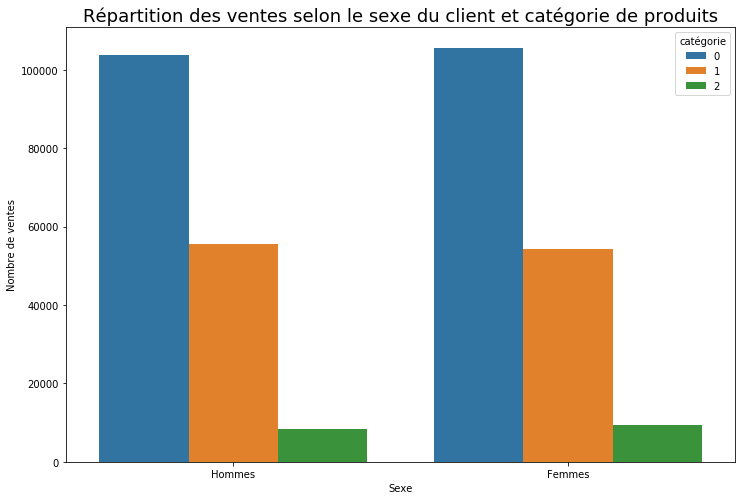

In [55]:
dataDiffClientSexParCat = data.groupby(['sex','categ'], as_index=False).sum()
# L'argument "as_index=False" permet d'éviter que les colonnes spécifiées dans "groupby"
# deviennent des index et ne peuvent donc plus être manipulées

# Projection pour ne conserver que les colonnes "client_id" et "sex" 
dataDiffClientSexParCat = dataDiffClientSexParCat.loc[ : ,("categ","sex","nombre_de_sessions")]

# Renommage de la colonne 'categ' avec 'catégorie' pour la légende du graphique
dataDiffClientSexParCat = dataDiffClientSexParCat.rename(columns={'categ':'catégorie'})

# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

sns.barplot(x='sex', y="nombre_de_sessions", hue='catégorie', data=dataDiffClientSexParCat)
plt.title("Répartition des ventes selon le sexe du client et catégorie de produits", fontsize=18)
marqueurs = [0,1]
xtick_labels = ['Hommes','Femmes']
plt.xticks(marqueurs, xtick_labels)
ax = plt.axes()
ax= ax.set(xlabel='Sexe', ylabel='Nombre de ventes')

plt.savefig("15.Repartition_ventes_selon_sexe_et_cat_produits.pdf", dpi=300)

<a id="chapitre_2_2_4"></a>
#### <span style="color: #348758">Indicateurs de tendance centrale et de dispersion pour l'âge des clients :</span>

In [94]:
# Tous les clients de la table 'customers' n'apparaissent pas dans la table 'transactions'.
# Ces clients ont dû faire un achat avant 2021. 
# Un client peut aussi acheter plusieurs produits.
# Il faut donc d'abord créé un tableau depuis le tableau 'data':

dataDiffClientAge = data.groupby(['client_id','age'], as_index=False).mean()

# L'argument "as_index=False" permet d'éviter que les colonnes spécifiées dans "groupby"
# deviennent des index et ne puissent donc plus être manipulées.

# Projection pour ne conserver que les colonnes "client_id" et "age" 

dataDiffClientAge = dataDiffClientAge.loc[ : ,("client_id","age")]

# Moyenne
meanAge = dataDiffClientAge['age'].mean()

# Médiane
medAge = dataDiffClientAge['age'].median()

# Mode
modAge = dataDiffClientAge['age'].mode()[0]

print("La moyenne d'âge de la clientèle est de", round(meanAge), "ans.")
print("50% des clients ont un âge inférieur à", round(medAge), "ans.")
print("Les clients ont le plus souvent",modAge,"ans.")

# Forme de la distribution
if modAge == medAge == meanAge :
    print("La distribution des âges des clients est symétrique.")
elif modAge < medAge < meanAge :
    print("La distribution des âges des clients est étalée à droite.")
else:
    print("La distribution des âges des clients est étalée à gauche.")

La moyenne d'âge de la clientèle est de 44 ans.
50% des clients ont un âge inférieur à 43 ans.
Les clients ont le plus souvent 18 ans.
La distribution des âges des clients est étalée à droite.


<a id="chapitre_2_2_5"></a>
#### <span style="color: #348758">Distribution empirique des clients selon leur âge :</span>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


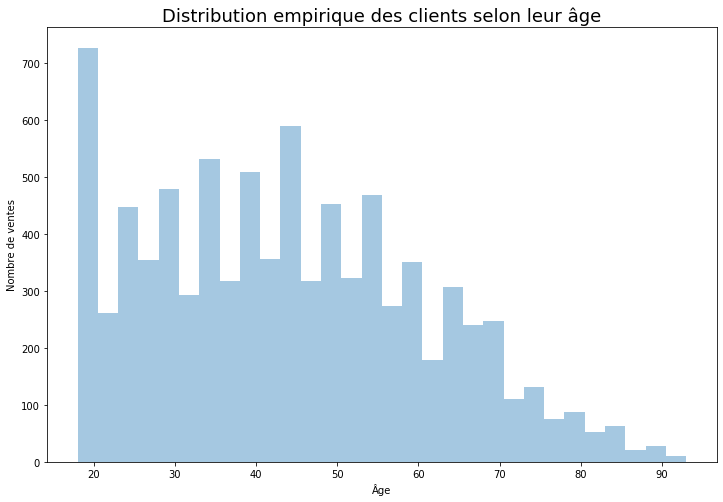

In [60]:
# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

sns.distplot(dataDiffClientAge['age'], kde=False)

plt.title("Distribution empirique des clients selon leur âge", fontsize=18)
ax = plt.axes()
ax = ax.set(xlabel='Âge', ylabel="Nombre de ventes")

plt.savefig("16.Distribution_empirique_clients_selon_age.pdf", dpi=300)

<a id="chapitre_2_2_6"></a>
#### <span style="color: #348758">Indicateurs de tendance centrale et de dispersion pour l'âge des clients de chaque catégorie de produit :</span>

--------------------
0
moy:
 43.89772043585801
med:
 42.0
mod:
 0    42
dtype: int64
La distribution empirique des âges des clients des produits de catégorie 0 est étalée à gauche.
--------------------
1
moy:
 47.65912425388436
med:
 47.0
mod:
 0    42
dtype: int64
La distribution empirique des âges des clients des produits de catégorie 1 est étalée à droite.
--------------------
2
moy:
 25.728179124886054
med:
 23.0
mod:
 0    18
dtype: int64
La distribution empirique des âges des clients des produits de catégorie 2 est étalée à droite.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

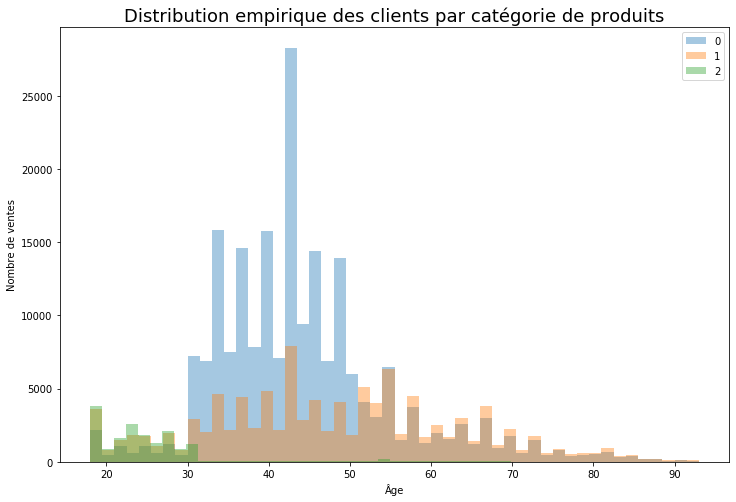

In [61]:
# Création d'une figure de taille 12x8 inch
plt.figure(figsize=(12,8))

for cat in data["categ"].unique():
    subset = data[data.categ == cat] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['age'].mean())
    print("med:\n",subset['age'].median())
    print("mod:\n",subset['age'].mode())
    modAgeParCat = subset['age'].mode()[0]
    medAgeParCat = subset['age'].median()
    meanAgeParCat = subset['age'].mean()
    if modAgeParCat == medAgeParCat == meanAgeParCat :
        print("La distribution empirique des âges des clients des produits de catégorie", cat, "est symétrique.")
    elif modAgeParCat < medAgeParCat < meanAgeParCat :
        print("La distribution empirique des âges des clients des produits de catégorie", cat, "est étalée à droite.")
    else:
        print("La distribution empirique des âges des clients des produits de catégorie", cat, "est étalée à gauche.")
    sns.distplot(subset['age'],kde=False, label= cat)
    plt.title("Distribution empirique des clients par catégorie de produits", fontsize=18)
    plt.legend(loc='best')
    ax = plt.axes()
    ax = ax.set(xlabel='Âge', ylabel="Nombre de ventes")
    
plt.savefig("17.Distribution_empirique_clients_par_catégorie_produits.pdf", dpi=300)

<a id="chapitre_2_2_7"></a>
#### <span style="color: #348758">Distribution empirique des clients des produits de catégorie 0 :</span>

No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


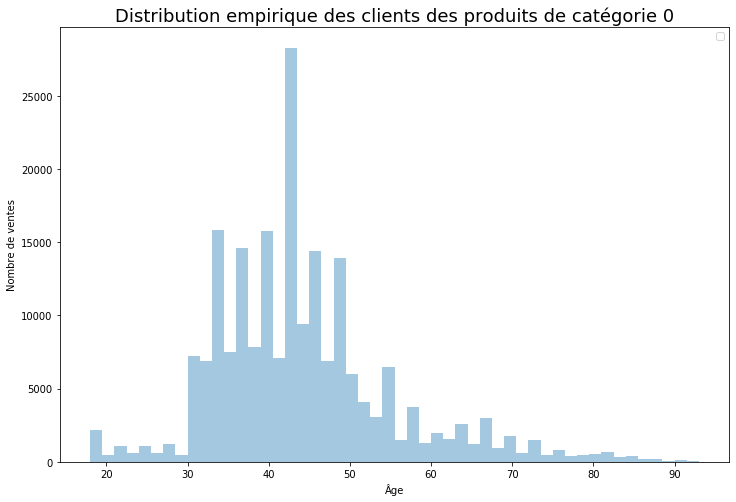

In [62]:
plt.figure(figsize=(12,8))

AgeClientsCat0 = data[data.categ == 0]

sns.distplot(AgeClientsCat0['age'],kde=False)
plt.title("Distribution empirique des clients des produits de catégorie 0", fontsize=18)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Âge', ylabel="Nombre de ventes")
    
plt.savefig("18.Distribution_empirique_clients_produits_catégorie_0.pdf", dpi=300)

<a id="chapitre_2_2_8"></a>
#### <span style="color: #348758">Distribution empirique des clients des produits de catégorie 1 :</span>

No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


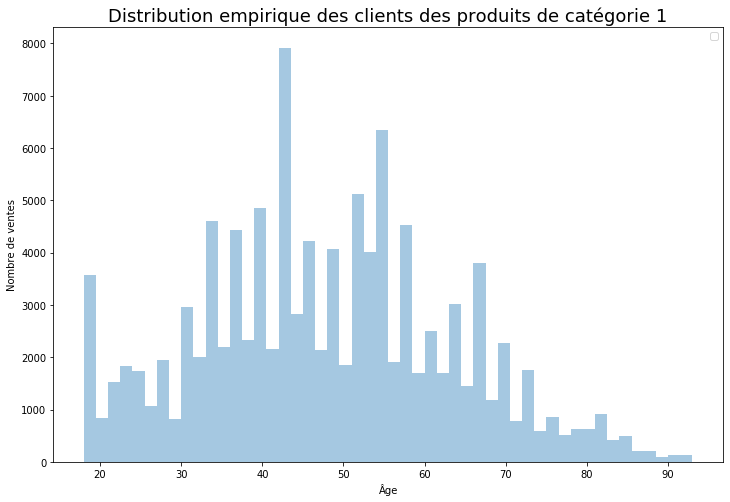

In [63]:
plt.figure(figsize=(12,8))

AgeClientsCat1 = data[data.categ == 1]

sns.distplot(AgeClientsCat1['age'],kde=False)
plt.title("Distribution empirique des clients des produits de catégorie 1", fontsize=18)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Âge', ylabel="Nombre de ventes")
    
plt.savefig("19.Distribution_empirique_clients_produits_catégorie_1.pdf", dpi=300)

<a id="chapitre_2_2_9"></a>
#### <span style="color: #348758">Distribution empirique des clients des produits de catégorie 2 :</span>

No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


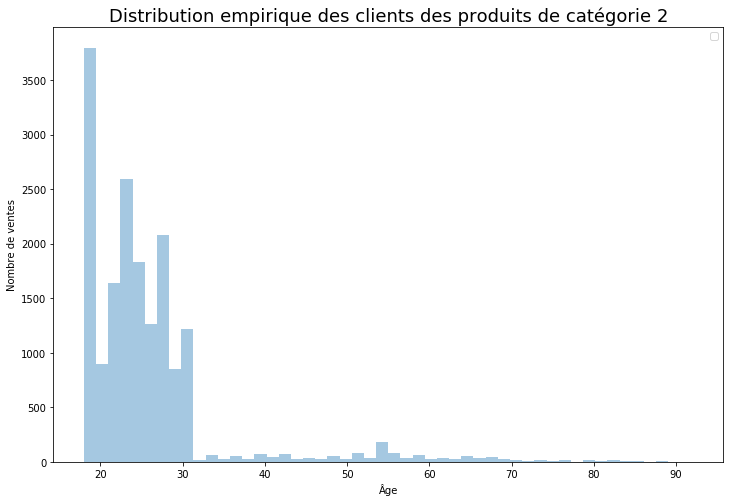

In [64]:
plt.figure(figsize=(12,8))

AgeClientsCat2 = data[data.categ == 2]

sns.distplot(AgeClientsCat2['age'],kde=False)
plt.title("Distribution empirique des clients des produits de catégorie 2", fontsize=18)
plt.legend(loc='best')
ax = plt.axes()
ax = ax.set(xlabel='Âge', ylabel="Nombre de ventes")
    
plt.savefig("20.Distribution_empirique_clients_produits_catégorie_2.pdf", dpi=300)

<a id="chapitre_2_2_10"></a>
#### <span style="color: #348758">Analyse de concentration pour l'âge des clients sur l'ensemble des ventes :</span>

In [95]:
# Variance empirique
varAge = dataDiffClientAge['age'].var(ddof=0)

# Variance empirique corrigée
varCorrAge = ((dataDiffClientAge['age'].sum())/(dataDiffClientAge['age'].sum()-1))*varAge

# Écart-type
ectAge = dataDiffClientAge['age'].std(ddof=0)

print("La variance empirique des âges est de", round(varAge),"ans.")
print("La variance empirique corrigée des âges est de", round(varAge),"ans.")
print("L'écart-type des âges est de", round(ectAge),"ans.")

# Skewness empirique
SkewnessAge = data['age'].skew()

if SkewnessAge < 0:
    print("Le skewness empirique est égal à",SkewnessAge,".")
    print("La distribution est étalée à gauche.")
elif SkewnessAge > 0:
    print("Le skewness empirique est égal à",SkewnessAge,".")
    print("La distribution est étalée à droite.")
else:
    print("Le skewness empirique est égal à",SkewnessAge,".")
    print("La distribution est symétrique.")
    
# Kurtosis empirique
KurtosisAge = data['age'].kurtosis()

if KurtosisAge < 0:
    print("Le kurtosis empirique est égal à",KurtosisAge,".")
    print("La distribution est plus aplatie qu'une distribution normale.")
    print("Les observations sont moins concentrée.")
elif KurtosisAge > 0:
    print("Le kurtosis empirique est égal à",KurtosisAge,".")
    print("La distribution est moins aplatie qu'une distribution normale.")
    print("Les observations sont plus concentrée.")
else:
    print("Le kurtosis empirique est égal à",KurtosisAge,".")
    print("La distribution a le même aplatissement qu'une distribution normale.")

La variance empirique des âges est de 286 ans.
La variance empirique corrigée des âges est de 286 ans.
L'écart-type des âges est de 17 ans.
Le skewness empirique est égal à 0.5804173699369055 .
La distribution est étalée à droite.
Le kurtosis empirique est égal à 0.45233507160756137 .
La distribution est moins aplatie qu'une distribution normale.
Les observations sont plus concentrée.


<a id="chapitre_2_2_11"></a>
#### <span style="color: #348758">Analyse de concentration pour l'âge des clients de chaque catégorie de produit :</span>

In [70]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("var:\n",subset['age'].var(ddof=0))
    print("ect:\n",subset['age'].std(ddof=0))
    print("skw:\n",subset['age'].skew())
    print("kur:\n",subset['age'].kurtosis())
    SkewnessAge = subset['age'].skew()
    if SkewnessAge < 0:
        print("Le skewness empirique est égal à",SkewnessAge,".")
        print("La distribution est étalée à gauche.")
    elif SkewnessAge > 0:
        print("Le skewness empirique est égal à",SkewnessAge,".")
        print("La distribution est étalée à droite.")
    else:
        print("Le skewness empirique est égal à",SkewnessAge,".")
        print("La distribution est symétrique.")
    KurtosisAge = subset['age'].kurtosis()
    if KurtosisAge < 0:
        print("Le kurtosis empirique est égal à",KurtosisAge,".")
        print("La distribution est plus aplatie qu'une distribution normale.")
        print("Les observations sont moins concentrées.")
    elif KurtosisAge > 0:
        print("Le kurtosis empirique est égal à",KurtosisAge,".")
        print("La distribution est moins aplatie qu'une distribution normale.")
        print("Les observations sont plus concentrées.")
    else:
        print("Le kurtosis empirique est égal à",KurtosisAge,".")
        print("La distribution a le même aplatissement qu'une distribution normale.")

--------------------
0
var:
 125.52194651922915
ect:
 11.20365772947519
skw:
 1.0182808742924
kur:
 1.8048203074679456
Le skewness empirique est égal à 1.0182808742924 .
La distribution est étalée à droite.
Le kurtosis empirique est égal à 1.8048203074679456 .
La distribution est moins aplatie qu'une distribution normale.
Les observations sont plus concentrées.
--------------------
1
var:
 240.4800401133713
ect:
 15.507418873344825
skw:
 0.1902006065302989
kur:
 -0.41092291609735776
Le skewness empirique est égal à 0.1902006065302989 .
La distribution est étalée à droite.
Le kurtosis empirique est égal à -0.41092291609735776 .
La distribution est plus aplatie qu'une distribution normale.
Les observations sont moins concentrées.
--------------------
2
var:
 90.62113392233542
ect:
 9.519513323817316
skw:
 3.010952127407814
kur:
 10.811934589640241
Le skewness empirique est égal à 3.010952127407814 .
La distribution est étalée à droite.
Le kurtosis empirique est égal à 10.811934589640241 

<a id="chapitre_2_2_12"></a>
#### <span style="color: #348758">Top 10 des meilleurs clients par mois :</span>

#### - Mars

In [96]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientMars2021 = dataTop10Client[dataTop10Client.month==3]
dataTop10ClientMars2021 = dataTop10ClientMars2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientMars2021 = dataTop10ClientMars2021.sort_values(by='price')
dataTop10ClientMars2021 = dataTop10ClientMars2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientMars2021 = dataTop10ClientMars2021.loc[::-1].head(10)

dataTop10ClientMars2021

,client_id,price,sex,nombre_de_sessions
157919,c_4958,300.00,0,1
163,c_1001,300.00,0,1
208600,c_623,247.22,1,1
74875,c_283,247.22,0,1
145692,c_4672,247.22,0,1
2122,c_1052,247.22,0,1
171080,c_5306,236.99,1,1
226443,c_6677,236.99,1,1
307692,c_935,236.99,1,1
290767,c_8258,236.99,1,1


#### - Avril :

In [97]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientAvril2021 = dataTop10Client[dataTop10Client.month==4]
dataTop10ClientAvril2021 = dataTop10ClientAvril2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientAvril2021 = dataTop10ClientAvril2021.sort_values(by='price')
dataTop10ClientAvril2021 = dataTop10ClientAvril2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientAvril2021 = dataTop10ClientAvril2021.loc[::-1].head(10)

dataTop10ClientAvril2021

,client_id,price,sex,nombre_de_sessions
239814,c_6977,247.22,1,1
177204,c_546,236.99,0,1
276560,c_7900,236.99,1,1
146048,c_4680,236.99,1,1
254928,c_7326,236.99,0,1
174556,c_5398,236.99,1,1
295765,c_8383,236.99,1,1
214895,c_6378,233.54,1,1
200721,c_6032,230.04,1,1
251791,c_7249,230.04,1,1


#### - Mai :

In [98]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientMai2021 = dataTop10Client[dataTop10Client.month==5]
dataTop10ClientMai2021 = dataTop10ClientMai2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientMai2021 = dataTop10ClientMai2021.sort_values(by='price')
dataTop10ClientMai2021 = dataTop10ClientMai2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientMai2021 = dataTop10ClientMai2021.loc[::-1].head(10)

dataTop10ClientMai2021

,client_id,price,sex,nombre_de_sessions
55960,c_2329,300.00,1,1
122839,c_4090,247.22,0,1
168157,c_5229,247.22,0,1
114966,c_3859,247.22,1,1
29517,c_1653,247.22,0,1
255579,c_7348,247.22,0,1
7706,c_1197,247.22,0,1
308194,c_950,247.22,1,1
15673,c_1399,247.22,1,1
242583,c_7036,247.22,1,1


#### - Juin :

In [99]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientJuin2021 = dataTop10Client[dataTop10Client.month==6]
dataTop10ClientJuin2021 = dataTop10ClientJuin2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientJuin2021 = dataTop10ClientJuin2021.sort_values(by='price')
dataTop10ClientJuin2021 = dataTop10ClientJuin2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientJuin2021 = dataTop10ClientJuin2021.loc[::-1].head(10)

dataTop10ClientJuin2021

,client_id,price,sex,nombre_de_sessions
168402,c_5237,300.00,0,1
61409,c_2467,300.00,1,1
263874,c_7578,254.44,0,1
87550,c_317,247.22,1,1
164204,c_5118,247.22,1,1
192547,c_5848,247.22,0,1
157913,c_4958,236.99,0,1
12598,c_1331,236.99,1,1
125792,c_4158,236.99,1,1
41656,c_1971,236.99,1,1


#### - Juillet :

In [100]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientJuillet2021 = dataTop10Client[dataTop10Client.month==7]
dataTop10ClientJuillet2021 = dataTop10ClientJuillet2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientJuillet2021 = dataTop10ClientJuillet2021.sort_values(by='price')
dataTop10ClientJuillet2021 = dataTop10ClientJuillet2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientJuillet2021 = dataTop10ClientJuillet2021.loc[::-1].head(10)

dataTop10ClientJuillet2021

,client_id,price,sex,nombre_de_sessions
219263,c_6493,247.22,1,1
157917,c_4958,247.22,0,1
149938,c_4791,247.22,0,1
299615,c_8490,247.22,1,1
278033,c_7936,236.99,1,1
92015,c_3290,236.99,0,1
239813,c_6977,236.99,1,1
88000,c_3185,236.99,0,1
156583,c_4954,236.99,1,1
138880,c_4489,236.99,1,1


#### - Août :

In [101]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientAout2021 = dataTop10Client[dataTop10Client.month==8]
dataTop10ClientAout2021 = dataTop10ClientAout2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientAout2021 = dataTop10ClientAout2021.sort_values(by='price')
dataTop10ClientAout2021 = dataTop10ClientAout2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientAout2021 = dataTop10ClientAout2021.loc[::-1].head(10)

dataTop10ClientAout2021

,client_id,price,sex,nombre_de_sessions
73379,c_2791,254.44,0,1
37010,c_1852,247.22,0,1
157918,c_4958,247.22,0,2
77205,c_2898,247.22,1,1
305792,c_876,247.22,1,1
225481,c_6651,247.22,1,1
51173,c_2212,247.22,0,1
231464,c_6761,247.22,1,1
38268,c_1889,247.22,1,1
230014,c_6714,247.22,1,1


#### - Septembre :

In [102]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientSept2021 = dataTop10Client[dataTop10Client.month==9]
dataTop10ClientSept2021 = dataTop10ClientSept2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientSept2021 = dataTop10ClientSept2021.sort_values(by='price')
dataTop10ClientSept2021 = dataTop10ClientSept2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientSept2021 = dataTop10ClientSept2021.loc[::-1].head(10)

dataTop10ClientSept2021

,client_id,price,sex,nombre_de_sessions
140256,c_4517,247.22,1,1
260431,c_7483,247.22,0,1
190881,c_5800,247.22,1,1
51243,c_2214,236.99,1,1
213607,c_6348,236.99,0,1
81627,c_3011,236.99,0,1
168156,c_5229,236.99,0,1
287022,c_8157,236.99,0,1
220093,c_6515,236.99,0,1
166448,c_5185,230.04,0,1


#### - Octobre :

In [103]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientOct2021 = dataTop10Client[dataTop10Client.month==10]
dataTop10ClientOct2021 = dataTop10ClientOct2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientOct2021 = dataTop10ClientOct2021.sort_values(by='price')
dataTop10ClientOct2021 = dataTop10ClientOct2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientOct2021 = dataTop10ClientOct2021.loc[::-1].head(10)

dataTop10ClientOct2021

,client_id,price,sex,nombre_de_sessions
130709,c_4286,247.22,1,1
185032,c_5662,247.22,1,1
234313,c_6832,247.22,1,1
147819,c_4738,247.22,0,1
304925,c_8617,247.22,0,1
114522,c_3849,236.99,1,1
296632,c_8407,236.99,1,1
297865,c_8449,236.99,0,1
181378,c_5574,236.99,0,1
104904,c_3582,230.04,0,1


#### - Novembre :

In [79]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientNov2021 = dataTop10Client[dataTop10Client.month==11]
dataTop10ClientNov2021 = dataTop10ClientNov2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientNov2021 = dataTop10ClientNov2021.sort_values(by='price')
dataTop10ClientNov2021 = dataTop10ClientNov2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientNov2021 = dataTop10ClientNov2021.loc[::-1].head(10)

dataTop10ClientNov2021

,client_id,price,nombre_de_sessions
51637,c_2221,254.44,1
308457,c_961,247.22,1
7263,c_1186,247.22,1
279779,c_7971,247.22,1
1175,c_1026,247.22,1
134995,c_44,247.22,1
94457,c_3355,247.22,1
69186,c_2676,236.99,1
300700,c_8517,236.99,1
142994,c_4591,236.99,1


#### - Décembre :

In [80]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientDec2021 = dataTop10Client[dataTop10Client.month==12]
dataTop10ClientDec2021 = dataTop10ClientDec2021.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientDec2021 = dataTop10ClientDec2021.sort_values(by='price')
dataTop10ClientDec2021 = dataTop10ClientDec2021.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientDec2021 = dataTop10ClientDec2021.loc[::-1].head(10)

dataTop10ClientDec2021

,client_id,price,nombre_de_sessions
157920,c_4958,300.00,2
225422,c_665,254.44,1
293243,c_8318,247.22,1
107260,c_3650,247.22,1
254283,c_7307,247.22,1
221992,c_6557,236.99,1
225524,c_6653,230.04,1
36343,c_1834,230.04,1
142322,c_4575,230.04,1
263274,c_7561,230.04,1


#### - Janvier :

In [81]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientJan2022 = dataTop10Client[dataTop10Client.month==13]
dataTop10ClientJan2022 = dataTop10ClientJan2022.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientJan2022 = dataTop10ClientJan2022.sort_values(by='price')
dataTop10ClientJan2022 = dataTop10ClientJan2022.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientJan2022 = dataTop10ClientJan2022.loc[::-1].head(10)

dataTop10ClientJan2022

,client_id,price,nombre_de_sessions
196584,c_5939,247.22,1
74709,c_2825,247.22,1
207909,c_6206,247.22,1
41686,c_1973,247.22,1
147803,c_4737,247.22,1
225359,c_6648,247.22,1
188056,c_5734,247.22,1
181396,c_5575,247.22,1
103619,c_3546,236.99,1
57334,c_2369,236.99,1


#### - Février :

In [82]:
dataTop10Client = data.sort_values(by='price')

dataTop10Client = dataTop10Client.groupby(['client_id','price','month'], as_index=False).sum()

dataTop10ClientFev2022 = dataTop10Client[dataTop10Client.month==14]
dataTop10ClientFev2022 = dataTop10ClientFev2022.drop(columns =['day','year','birth','age', 'categ','month'])
dataTop10ClientFev2022 = dataTop10ClientFev2022.sort_values(by='price')
dataTop10ClientFev2022 = dataTop10ClientFev2022.drop_duplicates(subset='client_id', keep='last')
dataTop10ClientFev2022 = dataTop10ClientFev2022.loc[::-1].head(10)

dataTop10ClientFev2022

,client_id,price,nombre_de_sessions
223224,c_659,300.00,1
307862,c_94,247.22,1
145087,c_4658,247.22,1
189657,c_5777,247.22,1
160915,c_5039,247.22,1
271303,c_7773,247.22,1
115704,c_3884,236.99,1
234671,c_6845,236.99,1
92016,c_3290,236.99,1
292223,c_8291,236.99,1


<a id="chapitre_3"></a>
### <span style="color: #030aa4">Analyses bivariées</span>

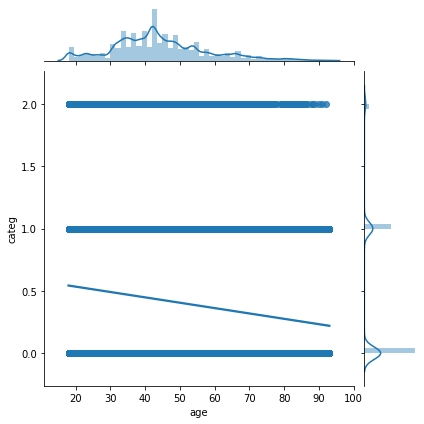

In [83]:
# Analyse entre l'âge des clients et la catégorie de produit

sns.jointplot('age','categ',data=data, kind='reg')

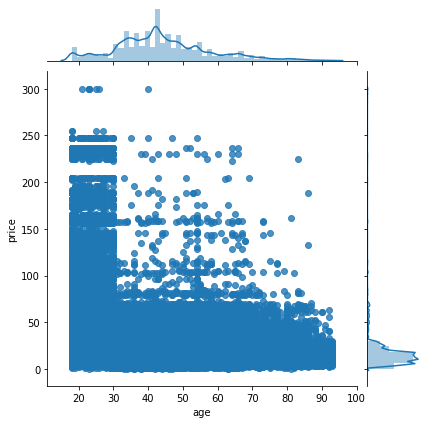

In [84]:
# Analyse entre l'âge des clients et le prix des produits

sns.jointplot('age','price',data=data, kind='reg')

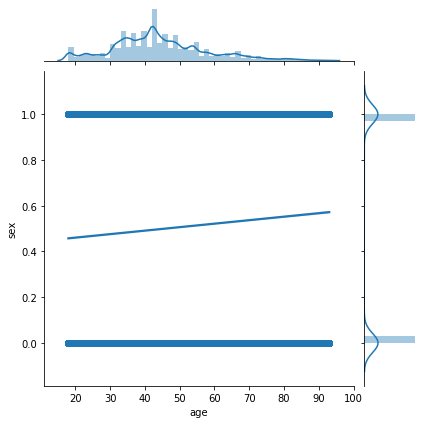

In [85]:
# Conversion de données 'sex' en données numériques:

dataSexNum = data

dataSexNum.replace({'m':0,'f':1}, inplace = True)

sns.jointplot('age','sex',data=dataSexNum, kind='reg')

<a id="chapitre_4"></a>
### <span style="color: #030aa4">Corrélations</span>


#### Affichage de toutes les corrélations entre chaque couple de variables

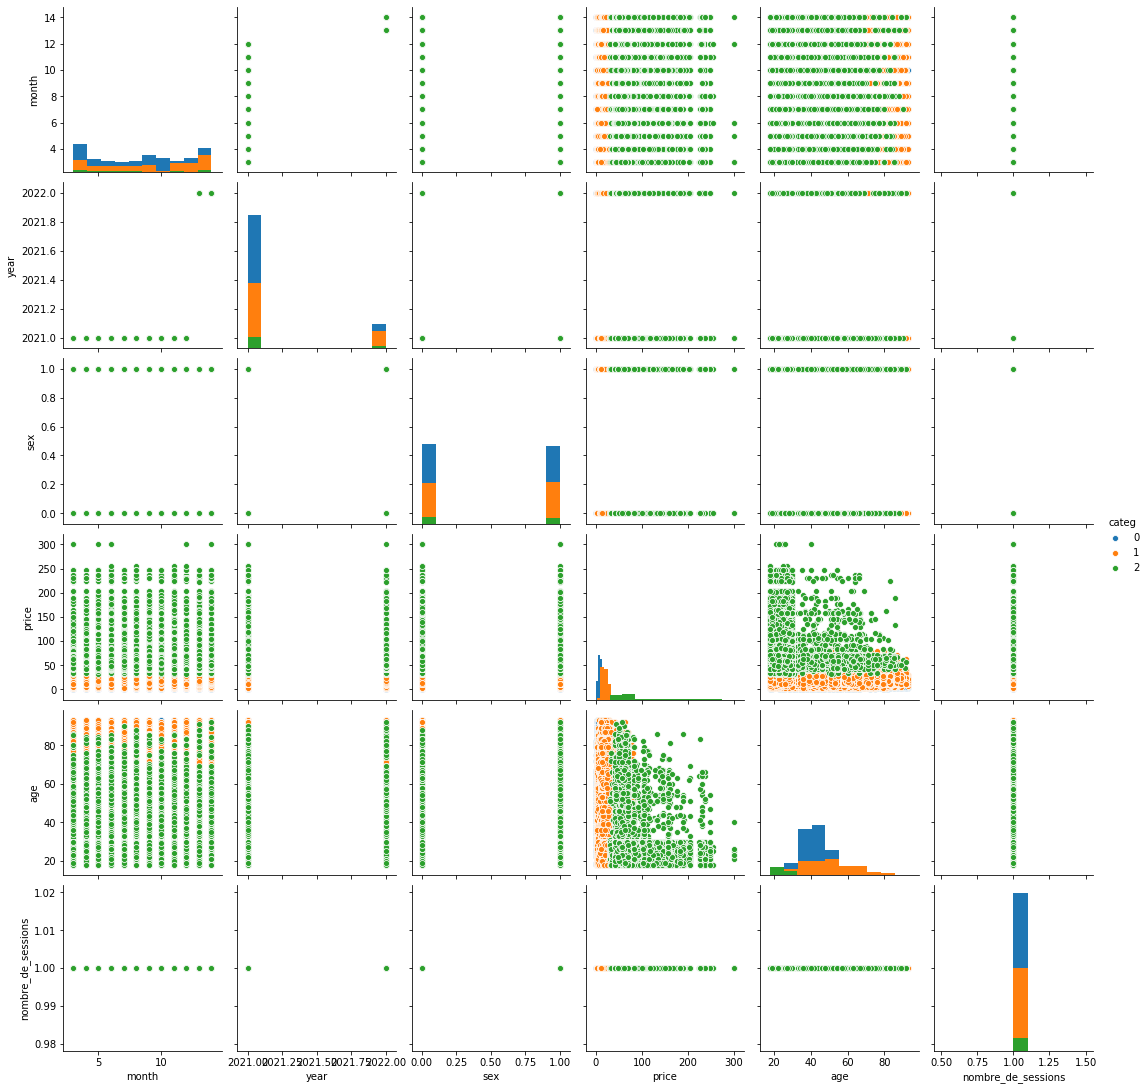

In [86]:
dataCorrelation = dataSexNum.drop(columns=['date', 'id_prod','session_id','client_id','day','birth'])

sns.pairplot(dataCorrelation, hue = "categ", diag_kind='hist')

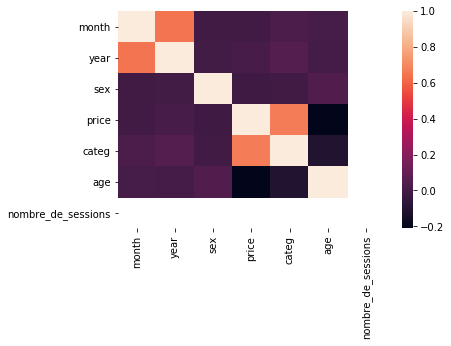

In [87]:
sns.heatmap(dataCorrelation.corr(), robust=True)

#### Les deux graphiques précédents permettent d'affirmer que:
- Plus le prix des produits vendus augmente et plus l'âge du client diminue.
- les corrélations entre les autres différentes variables étudiées sont très faibles.

<a id="chapitre_5"></a>
### <span style="color: #030aa4">Mission n°3</span>

#### Analyse de corrélation :

- Entre deux variables **quantitatives** : 
    - Utilisation du **coefficient de corrélation de Pearson r** (ou coefficient de correlation linéaire). Ce coefficient indique si les variables analysées sont corrélées.
    - L'interprétation du coefficient de corrélation de Pearson correspond à cette source : https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)#Interpr%C3%A9tation
    - Utilisation du **coefficient de détermination R^2**. Ce coefficient permet de mesurer la qualité de prédiction d'une régression linéaire.
    - L'interprétation du coefficient de détermination correspond à cette source : https://lexique.netmath.ca/coefficient-de-determination/
- Entre une variable **qualitative** et une variable **quantitative** :
    - Utilisation du **rapport de corrélation η^2** .
    - L'interprétation du rapport de corrélation correspond à cette source :https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4774896-analysez-une-variable-quantitative-et-une-qualitative-par-anova
- Entre deux variables **qualitatives** :
    - utilisation de la **mesure ε**.
    - L'interprétation de la mesure ε correspond à cette source : https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2

#### Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

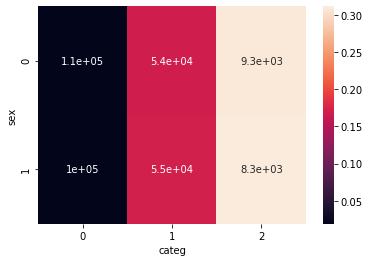

In [105]:
# Les deux variables sont qualitatives
# Utilisation de la mesure ε


# Création d'un tableau de contingence

X = "sex"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

# Création d'un tableau de contingence coloré
# La couleur de chaque case indique le niveau de corrélation entre les variables

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

#### L'indice de corrélation entre le sexe et la catégorie donne le même résultat quel que soit le sexe du client.
#### Il n'y a pas de corrélation entre le sexe du client et la catégorie de produit.

#### Y a-t-il une corrélation entre l'âge des clients  et le montant total des achats  ?

In [106]:
# Les deux variables sont quantitatives
# Utilisation du coefficient de corrélation de Pearson r
# Utilisation du coefficient de détermination R^2


dataMontantTotalParAge = data.groupby(['age'], as_index=False).sum()

CorrAgeMontantTotal = st.pearsonr(dataMontantTotalParAge["age"],dataMontantTotalParAge["price"])[0]

DetAgeMontantTotal = CorrAgeMontantTotal**2

if abs(CorrAgeMontantTotal) == 1 :
    print("Le coefficient de corrélation de Pearson est égal à", CorrAgeMontantTotal, ".")
    print("La corrélation entre l'âge des clients et le montant total des produits achetés est parfaite.")
elif 0.5 <= abs(CorrAgeMontantTotal) < 1 :
    print("Le coefficient de corrélation de Pearson est égal à", CorrAgeMontantTotal, ".")
    print("La corrélation entre l'âge des clients et le montant total des produits achetés est forte.")
elif 0 < abs(CorrAgeMontantTotal) < 0.5 :
    print("Le coefficient de corrélation de Pearson est égal à", CorrAgeMontantTotal, ".")
    print("La corrélation entre l'âge des clients et le montant total des produits achetés est faible.")
else:
    print("Le coefficient de corrélation de Pearson est égal à", CorrAgeMontantTotal, ".")
    print("Il n'y a pas de corrélation entre l'âge des clients et le montant total des produits achetés.")
    
if DetAgeMontantTotal == 1 :
    print("Le coefficient de détermination est égal à", DetAgeMontantTotal, ".")
    print("Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés sont parfaitement alignés sur la droite de régression linéaire.")
elif 0.5 <= DetAgeMontantTotal < 1 :
    print("Le coefficient de détermination est égal à", DetAgeMontantTotal, ".")
    print("Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés se resserrent autour de la droite de régression linéaire.")
elif 0 < DetAgeMontantTotal < 0.5 :
    print("Le coefficient de détermination est égal à", DetAgeMontantTotal, ".")
    print("Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés ne se resserrent pas autour de la droite de régression linéaire.")
else:
    print("Le coefficient de détermination est égal à", DetAgeMontantTotal, ".")
    print("La droite de régression linéaire n'explique absolument pas la distribution des points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés.")

Le coefficient de corrélation de Pearson est égal à -0.7746580837682115 .
La corrélation entre l'âge des clients et le montant total des produits achetés est forte.
Le coefficient de détermination est égal à 0.6000951467474375 .
Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés se resserrent autour de la droite de régression linéaire.


#### Y a-t-il une corrélation entre l'âge des clients  et la fréquence d'achat (i.e. le nombre d'achats par mois par ex) ?

In [107]:
# Les deux variables sont quantitatives
# Utilisation du coefficient de corrélation de Pearson r
# Utilisation du coefficient de détermination R^2

dataAchatsParMois = data.groupby(['month','age'], as_index=False).sum()

CorrAgeNombreAchatsParMois = st.pearsonr(dataAchatsParMois["age"],dataAchatsParMois["nombre_de_sessions"])[0]

DetAgeNombreAchatsParMois = CorrAgeNombreAchatsParMois**2

if abs(CorrAgeNombreAchatsParMois) == 1 :
    print("Le coefficient de Pearson est égal à", CorrAgeNombreAchatsParMois, ".")
    print("La corrélation entre le sexe des clients et les catégories de produits achetés est parfaite.")
elif 0.5 <= abs(CorrAgeNombreAchatsParMois) < 1 :
    print("Le coefficient de Pearson est égal à", CorrAgeNombreAchatsParMois, ".")
    print("La corrélation entre le sexe des clients et les catégories de produits achetés est forte.")
elif 0 < abs(CorrAgeNombreAchatsParMois) < 0.5 :
    print("Le coefficient de Pearson est égal à", CorrAgeNombreAchatsParMois, ".")
    print("La corrélation entre le sexe des clients et les catégories de produits achetés est faible.")
else:
    print("Le coefficient de Pearson est égal à", CorrAgeNombreAchatsParMois, ".")
    print("Il n'y a pas de corrélation entre le sexe des clients et les catégories de produits achetés.")
    
if DetAgeNombreAchatsParMois == 1 :
    print("Le coefficient de détermination est égal à", DetAgeNombreAchatsParMois, ".")
    print("Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés sont parfaitement alignés sur la droite de régression linéaire.")
elif 0.5 <= DetAgeNombreAchatsParMois < 1 :
    print("Le coefficient de détermination est égal à", DetAgeNombreAchatsParMois, ".")
    print("Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés se resserrent autour de la droite de régression linéaire.")
elif 0 < DetAgeNombreAchatsParMois < 0.5 :
    print("Le coefficient de détermination est égal à", DetAgeNombreAchatsParMois, ".")
    print("Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés ne se resserrent pas autour de la droite de régression linéaire.")
else:
    print("Le coefficient de détermination est égal à", DetAgeNombreAchatsParMois, ".")
    print("La droite de régression linéaire n'explique absolument pas la distribution des points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés.")

Le coefficient de Pearson est égal à -0.5193273001353251 .
La corrélation entre le sexe des clients et les catégories de produits achetés est forte.
Le coefficient de détermination est égal à 0.2697008446658461 .
Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés ne se resserrent pas autour de la droite de régression linéaire.


#### Y a-t-il une corrélation entre l'âge des clients  et la taille du panier moyen (en nombre d'articles) ?

In [108]:
# Les deux variables sont quantitatives
# Utilisation du coefficient de corrélation de Pearson r
# Utilisation du coefficient de détermination R^2


# On crée d'abord un tableau donnant la somme du nombre de sessions selon le client et l'âge

dataNombreArticlesParClients = data.groupby(['client_id','age'], as_index=False).sum()

# Puis on crée un nouveau tableau donnant la moyenne du nombre de sessions selon l'âge du client
# calculé depuis le tableau précédent

dataNombreArticlesMoyenParClients= dataNombreArticlesParClients.groupby(['age'], as_index=False).mean()

CorrAgeMontantPanierMoyen = st.pearsonr(dataNombreArticlesMoyenParClients["age"],
                                        dataNombreArticlesMoyenParClients["nombre_de_sessions"])[0]

DetAgeMontantPanierMoyen = CorrAgeMontantPanierMoyen**2

if abs(CorrAgeMontantPanierMoyen) == 1 :
    print("Le coefficient de Pearson est égal à", CorrAgeMontantPanierMoyen, ".")
    print("La corrélation entre le sexe des clients et les catégories de produits achetés est parfaite.")
elif 0.5 <= abs(CorrAgeMontantPanierMoyen) < 1 :
    print("Le coefficient de Pearson est égal à", CorrAgeMontantPanierMoyen, ".")
    print("La corrélation entre le sexe des clients et les catégories de produits achetés est forte.")
elif 0 < abs(CorrAgeMontantPanierMoyen) < 0.5 :
    print("Le coefficient de Pearson est égal à", CorrAgeMontantPanierMoyen, ".")
    print("La corrélation entre le sexe des clients et les catégories de produits achetés est faible.")
else:
    print("Le coefficient de Pearson est égal à", CorrAgeMontantPanierMoyen, ".")
    print("Il n'y a pas de corrélation entre le sexe des clients et les catégories de produits achetés.")
    
if DetAgeMontantPanierMoyen == 1 :
    print("Le coefficient de détermination est égal à", DetAgeMontantPanierMoyen, ".")
    print("Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés sont parfaitement alignés sur la droite de régression linéaire.")
elif 0.5 <= DetAgeMontantPanierMoyen < 1 :
    print("Le coefficient de détermination est égal à", DetAgeMontantPanierMoyen, ".")
    print("Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés se resserrent autour de la droite de régression linéaire.")
elif 0 < DetAgeMontantPanierMoyen < 0.5 :
    print("Le coefficient de détermination est égal à", DetAgeMontantPanierMoyen, ".")
    print("Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés ne se resserrent pas autour de la droite de régression linéaire.")
else:
    print("Le coefficient de détermination est égal à", DetAgeMontantPanierMoyen, ".")
    print("La droite de régression linéaire n'explique absolument pas la distribution des points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés.")

Le coefficient de Pearson est égal à -0.2339113794644813 .
La corrélation entre le sexe des clients et les catégories de produits achetés est faible.
Le coefficient de détermination est égal à 0.05471453344297656 .
Les points de l'analyse bivariée entre l'âge des clients et le montant total des produits achetés ne se resserrent pas autour de la droite de régression linéaire.


#### Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?

In [109]:
# L'âge des clients est une variable quantitative
# La catégorie de produit est une variable qualitative
# Utilisation du rapport de corrélation η^2

X = "categ" # qualitative
Y = "age" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data[X],data[Y])

0.11886832303678066

#### La corrélation entre l'âge des clients et les catégories de produits est faible.